In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
train = pd.read_csv('train.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
train.shape

(381109, 12)

In [31]:
test = pd.read_csv('test.csv')
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
test.shape

(127037, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [8]:
train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [9]:
train['Region_Code'].nunique()

53

In [10]:
train['Policy_Sales_Channel'].nunique()

155

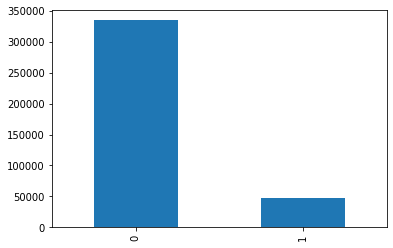

In [11]:
train['Response'].value_counts().plot(kind = 'bar')

In [12]:
print('% of No Response is',(len(train[train['Response'] == 0])/train.shape[0])*100)
print('% of Yes Response is',(len(train[train['Response'] == 1])/train.shape[0])*100)

% of No Response is 87.74366388618479
% of Yes Response is 12.256336113815209


In [32]:
newtrain = train.copy()
newtest = test.copy()

In [33]:
newtrain = newtrain.drop(['Driving_License', 'id', 'Vintage', 'Region_Code', 'Gender', 'Age'], axis = 1)
newtest = newtest.drop(['Driving_License', 'id', 'Vintage', 'Region_Code', 'Gender', 'Age'], axis = 1)

In [34]:
newtrain = pd.get_dummies(newtrain)
newtest = pd.get_dummies(newtest)

In [35]:
newtrain.shape

(381109, 8)

In [36]:
newtest.shape

(127037, 7)

In [37]:
x_train = newtrain.drop('Response', axis = 1)
y_train = newtrain['Response']
x_test = newtest

In [38]:
from imblearn.over_sampling import SMOTE
s=SMOTE(ratio='minority')
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


334399
334399


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(xtrain_reset,ytrain_reset).predict(x_test)
solution = pd.DataFrame({'id': test.id, 'Response': y_pred})
solution.to_csv('GAB3.csv', index = False)

In [40]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
y_pred = adab.fit(xtrain_reset,ytrain_reset).predict(x_test)
solution = pd.DataFrame({'id': test.id, 'Response': y_pred})
solution.to_csv('ADAB7 .csv', index = False)

In [63]:
## removed Driving_License', 'id', 'Vintage
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
y_pred = adab.fit(xtrain_reset,ytrain_reset).predict(x_test)
solution = pd.DataFrame({'id': test.id, 'Response': y_pred})
solution.to_csv('ADAB2.csv', index = False)
## 75